# Basic concepts on Time Series 

## Loading a time series

In [108]:
import pandas as pd

df = pd.read_csv('https://datahub.io/core/natural-gas/r/monthly.csv', parse_dates=['Month'])
df.head()

,Month,Price
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25


In [109]:
df = df.set_index('Month')
ts = df['Price']

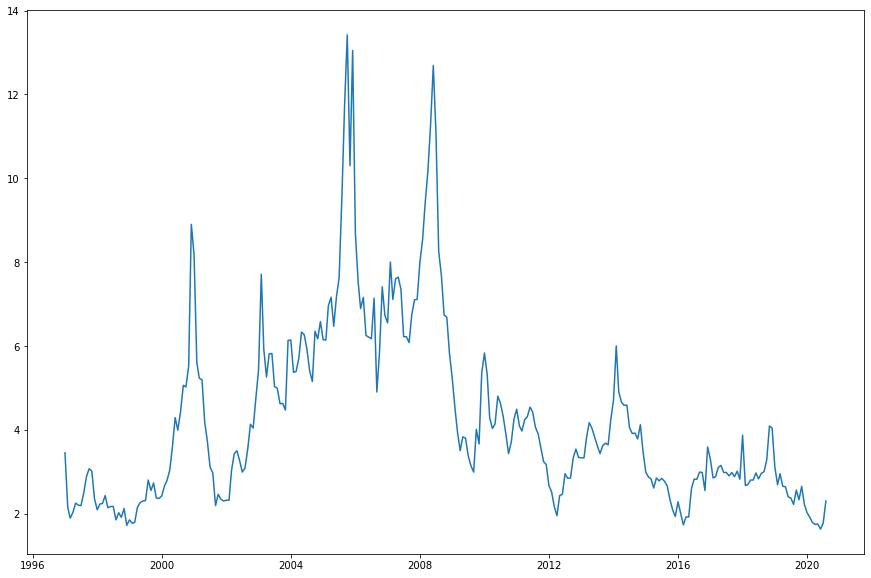

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(ts)

plt.show()

## Checking stationarity

In [111]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        return True
    else:
        return False

In [112]:
test_result = is_stationary(ts)
if test_result == True:
    print('The series is stationary')
else:
    print('The series is NOT stationary')

The series is NOT stationary


In [113]:
ts2 = ts.diff()
ts2.dropna(inplace=True)

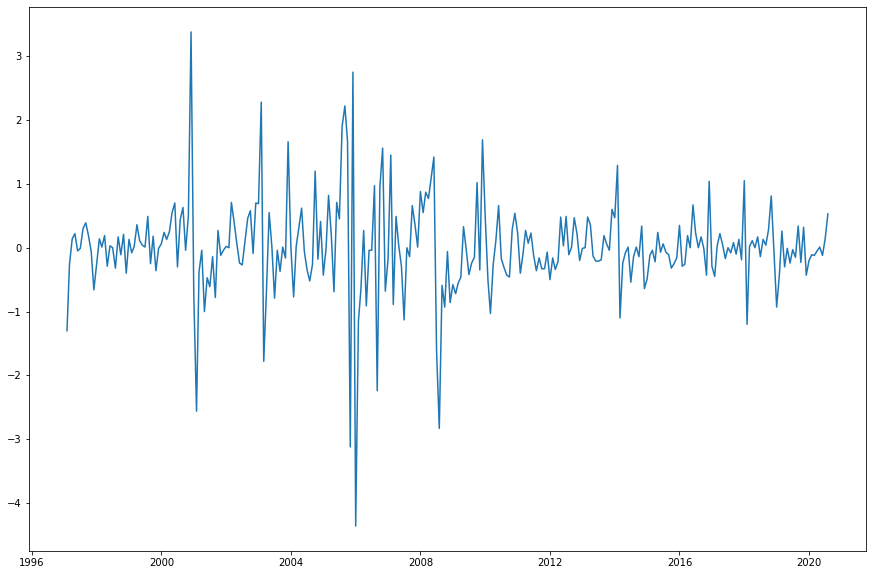

In [114]:
plt.figure(figsize=(15,10))
plt.plot(ts2)

plt.show()

In [115]:
test_result = is_stationary(ts2)
if test_result == True:
    print('The series is stationary')
else:
    print('The series is NOT stationary')

The series is stationary


In [40]:
ts3 = ts2.cumsum()

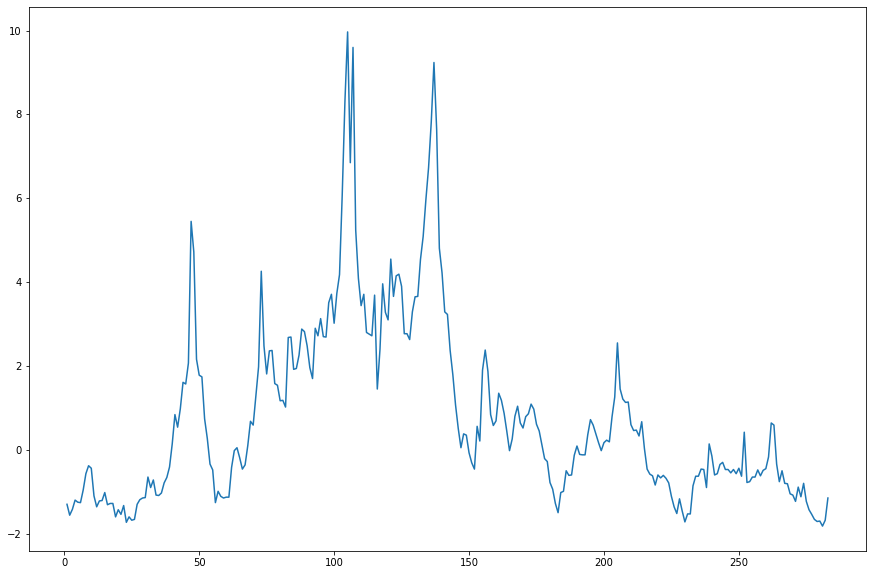

In [117]:
plt.figure(figsize=(15,10))
plt.plot(ts3)

plt.show()

## Decomposing a time series

Dataset from [Kaggle](https://www.kaggle.com/datasets/rakannimer/air-passengers)

In [121]:
df = pd.read_csv('source/AirPassengers.csv', parse_dates=['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [122]:
df = df.set_index('Month')
ts = df['#Passengers']

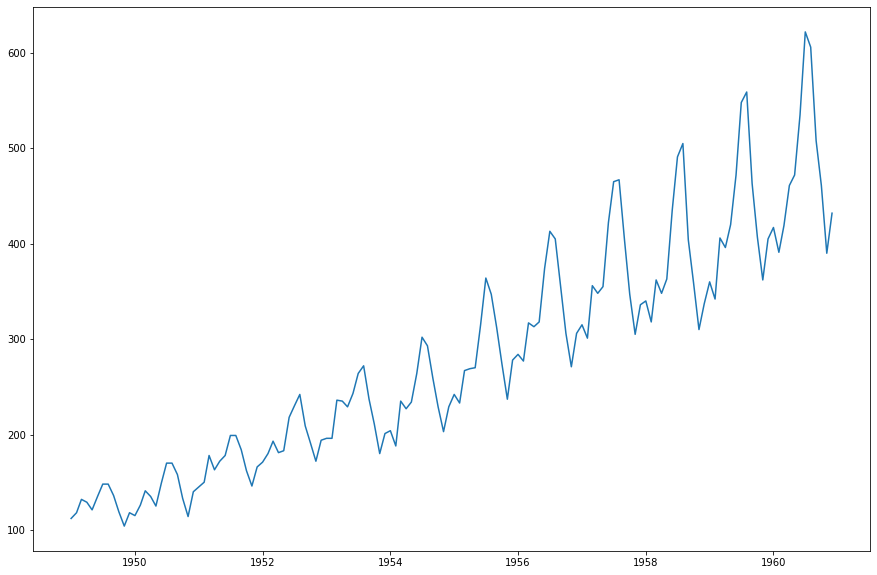

In [123]:
plt.figure(figsize=(15,10))
plt.plot(ts)

plt.show()

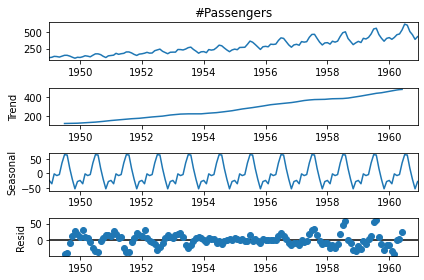

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period=12)
result.plot()
plt.show()

In [125]:
seasonality = result.seasonal
adjusted_ts = ts - seasonality

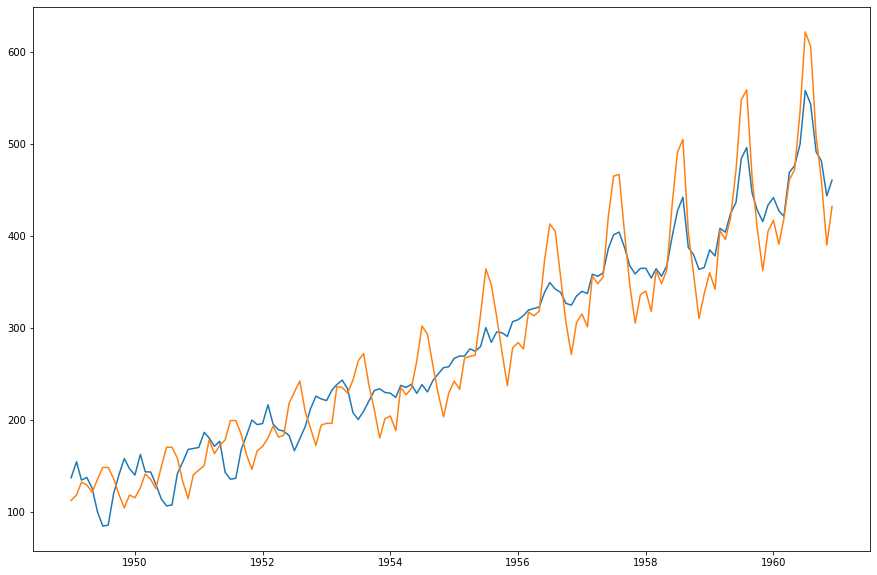

In [126]:
plt.figure(figsize=(15,10))
plt.plot(adjusted_ts)
plt.plot(ts)
plt.show()

## Break points

In [127]:
df = pd.read_csv("source/WHO-COVID-19-global-data.csv", parse_dates=['Date_reported'])
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [128]:
df = df[df['Country'] == 'Italy']

In [129]:
df.sort_values(by='Date_reported', inplace=True)

In [130]:
df.set_index('Date_reported', inplace=True)
ts = df['New_cases']

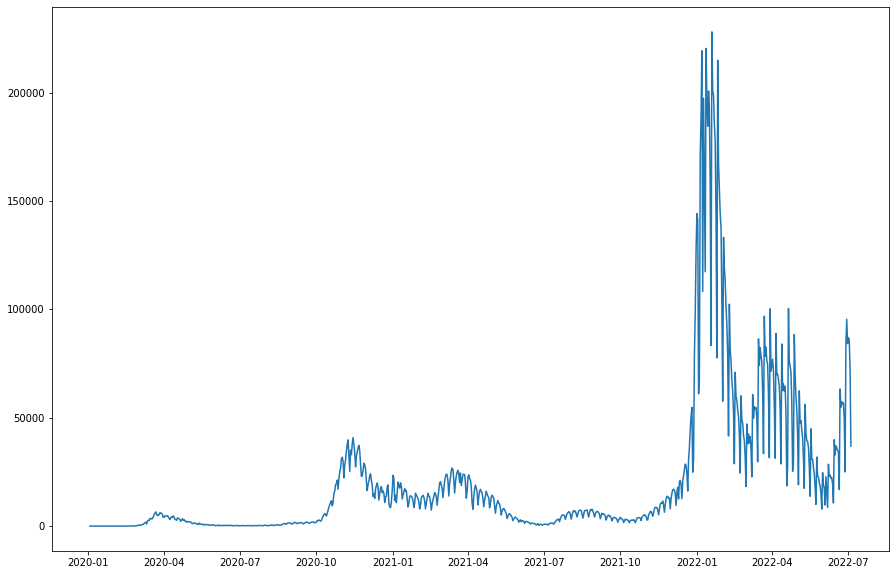

In [131]:
plt.figure(figsize=(15,10))
plt.plot(ts)
plt.show()